In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import shap

In [3]:
df=pd.read_csv('/content/drive/MyDrive/DATA_SCIENCE/CSV_XLSX_files/customer_churn-2.csv')

In [4]:
churn=df.copy()

In [5]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn.shape

(7043, 21)

In [8]:
churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
churn.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
churn.dropna(inplace=True)

In [13]:
churn.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
churn.shape

(7032, 21)

In [15]:

churn.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
churn.drop(columns=['customerID'],inplace=True)

In [17]:
churn.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [18]:
le=LabelEncoder()
churn['gender']=le.fit_transform(churn['gender'])

In [19]:
churn['Partner']=le.fit_transform(churn['Partner'])
churn['Dependents']=le.fit_transform(churn['Dependents'])
churn['PhoneService']=le.fit_transform(churn['PhoneService'])
churn['MultipleLines']=le.fit_transform(churn['MultipleLines'])
churn['InternetService']=le.fit_transform(churn['InternetService'])
churn['OnlineSecurity']=le.fit_transform(churn['OnlineSecurity'])
churn['OnlineBackup']=le.fit_transform(churn['OnlineBackup'])
churn['DeviceProtection']=le.fit_transform(churn['DeviceProtection'])
churn['TechSupport']=le.fit_transform(churn['TechSupport'])
churn['StreamingTV']=le.fit_transform(churn['StreamingTV'])
churn['StreamingMovies']=le.fit_transform(churn['StreamingMovies'])
churn['Contract']=le.fit_transform(churn['Contract'])
churn['PaperlessBilling']=le.fit_transform(churn['PaperlessBilling'])
churn['PaymentMethod']=le.fit_transform(churn['PaymentMethod'])
churn['Churn']=le.fit_transform(churn['Churn'])


In [20]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


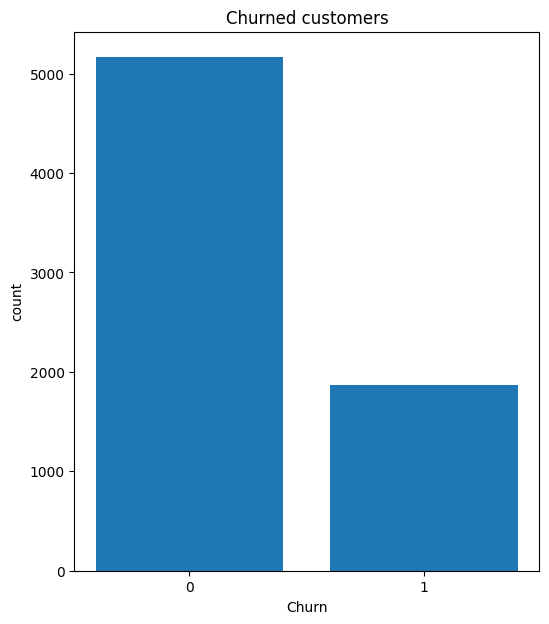

In [21]:
churn_counts=churn['Churn'].value_counts()
plt.figure(figsize=(6,7))
plt.bar(churn_counts.index.astype(str),churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('count')
plt.title('Churned customers')
plt.show()

In [22]:
churn_percent=churn['Churn'].value_counts(normalize=True)*100
print(churn_percent)

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


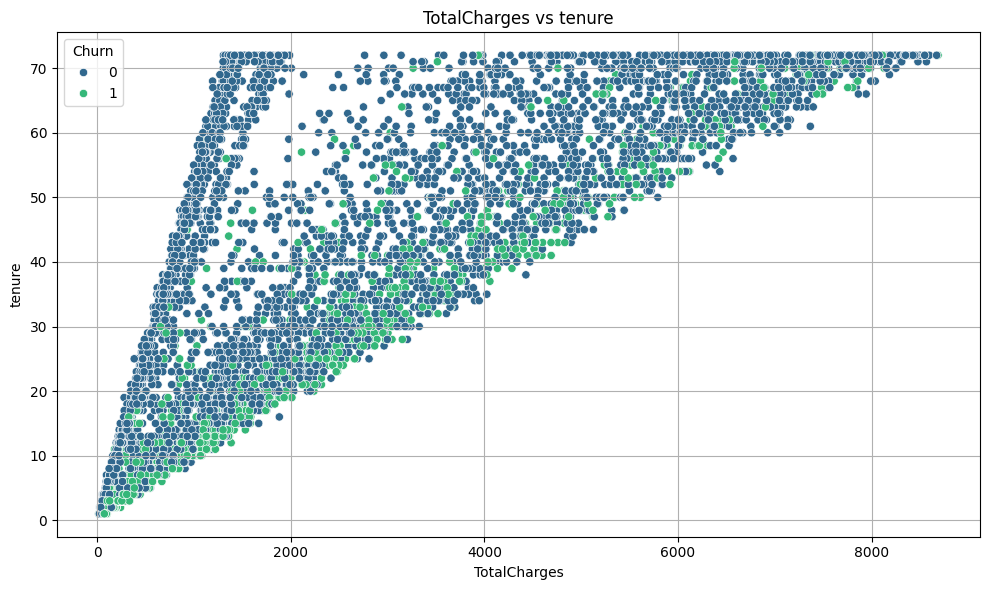

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',palette='viridis',data=churn)
plt.xlabel('TotalCharges')
plt.ylabel('tenure')
plt.title('TotalCharges vs tenure')
plt.tight_layout()
plt.grid(True)
plt.show()

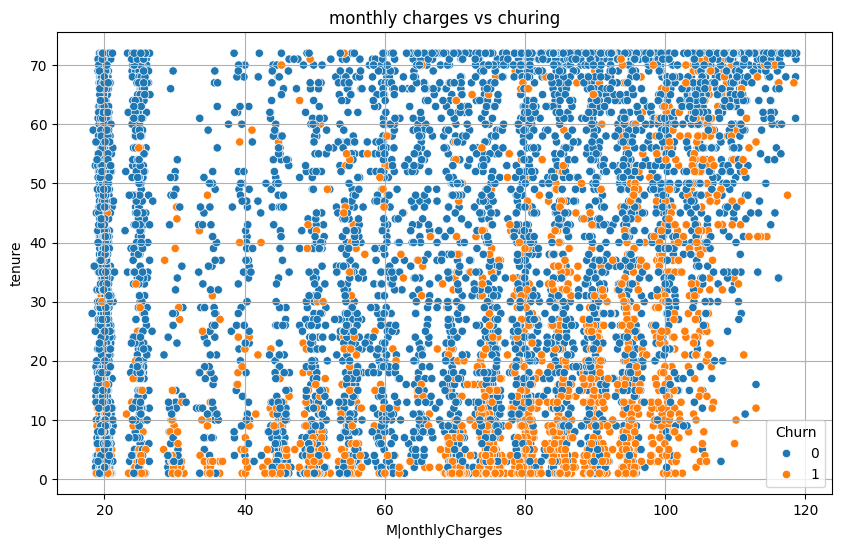

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MonthlyCharges',y='tenure',hue='Churn',data=churn)
plt.xlabel('M|onthlyCharges')
plt.ylabel('tenure')
plt.title('monthly charges vs churing')
plt.grid(True)
plt.tight_layout
plt.show()

In [25]:
# as we can clearly see how customers are churning when the monthly charges are geetting high.
# we can clearly see low budget monthly charges are only 0.5-to 2% of customers hardly churned.

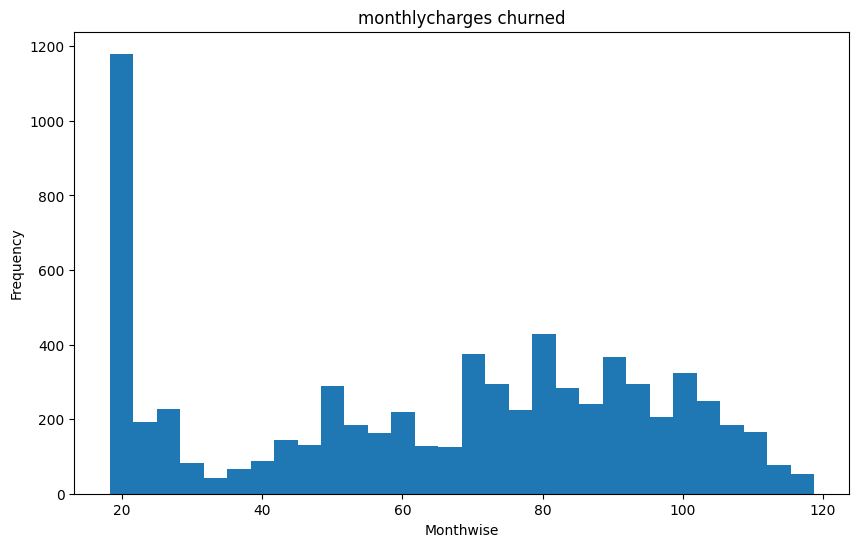

In [26]:
plt.figure(figsize=(10,6))
plt.hist(churn['MonthlyCharges'],bins=30)
plt.xlabel('Monthwise')
plt.ylabel('Frequency')
plt.title('monthlycharges churned')
plt.show()

In [27]:
churn['MonthlyCharges'].min()


18.25

In [28]:
churn['MonthlyCharges'].max()


118.75

In [29]:
#can clearly see 1180 person has not churned on lowest monthly charges but after that gradually dip in the monthlu charges

In [30]:
counts, bin_edges = np.histogram(churn['MonthlyCharges'], bins=30)

for i in range(len(counts)):
    print(f"Range: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} Customers: {counts[i]}")


Range: 18.25 to 21.60 Customers: 1180
Range: 21.60 to 24.95 Customers: 193
Range: 24.95 to 28.30 Customers: 227
Range: 28.30 to 31.65 Customers: 83
Range: 31.65 to 35.00 Customers: 42
Range: 35.00 to 38.35 Customers: 66
Range: 38.35 to 41.70 Customers: 88
Range: 41.70 to 45.05 Customers: 145
Range: 45.05 to 48.40 Customers: 132
Range: 48.40 to 51.75 Customers: 288
Range: 51.75 to 55.10 Customers: 185
Range: 55.10 to 58.45 Customers: 164
Range: 58.45 to 61.80 Customers: 218
Range: 61.80 to 65.15 Customers: 128
Range: 65.15 to 68.50 Customers: 126
Range: 68.50 to 71.85 Customers: 376
Range: 71.85 to 75.20 Customers: 294
Range: 75.20 to 78.55 Customers: 224
Range: 78.55 to 81.90 Customers: 429
Range: 81.90 to 85.25 Customers: 283
Range: 85.25 to 88.60 Customers: 240
Range: 88.60 to 91.95 Customers: 367
Range: 91.95 to 95.30 Customers: 295
Range: 95.30 to 98.65 Customers: 207
Range: 98.65 to 102.00 Customers: 325
Range: 102.00 to 105.35 Customers: 250
Range: 105.35 to 108.70 Customers: 183

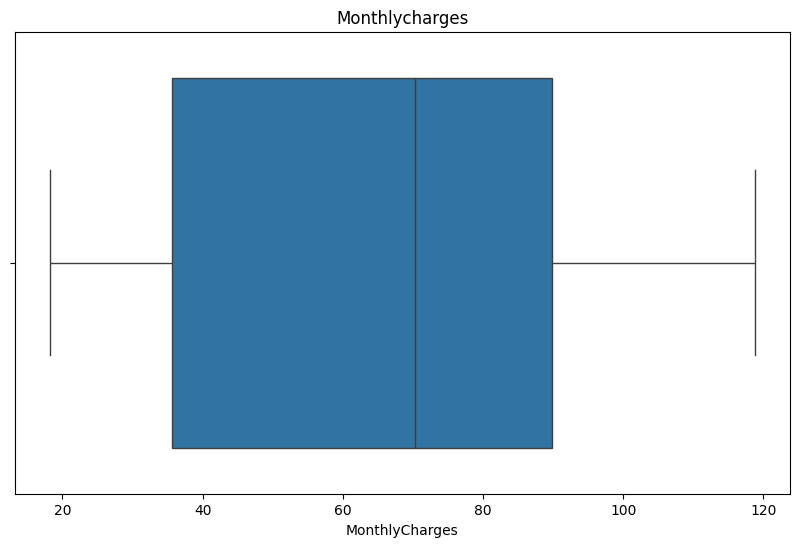

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x=churn['MonthlyCharges'])
plt.title('Monthlycharges')
plt.show()

In [32]:
churn['MonthlyCharges'].describe()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


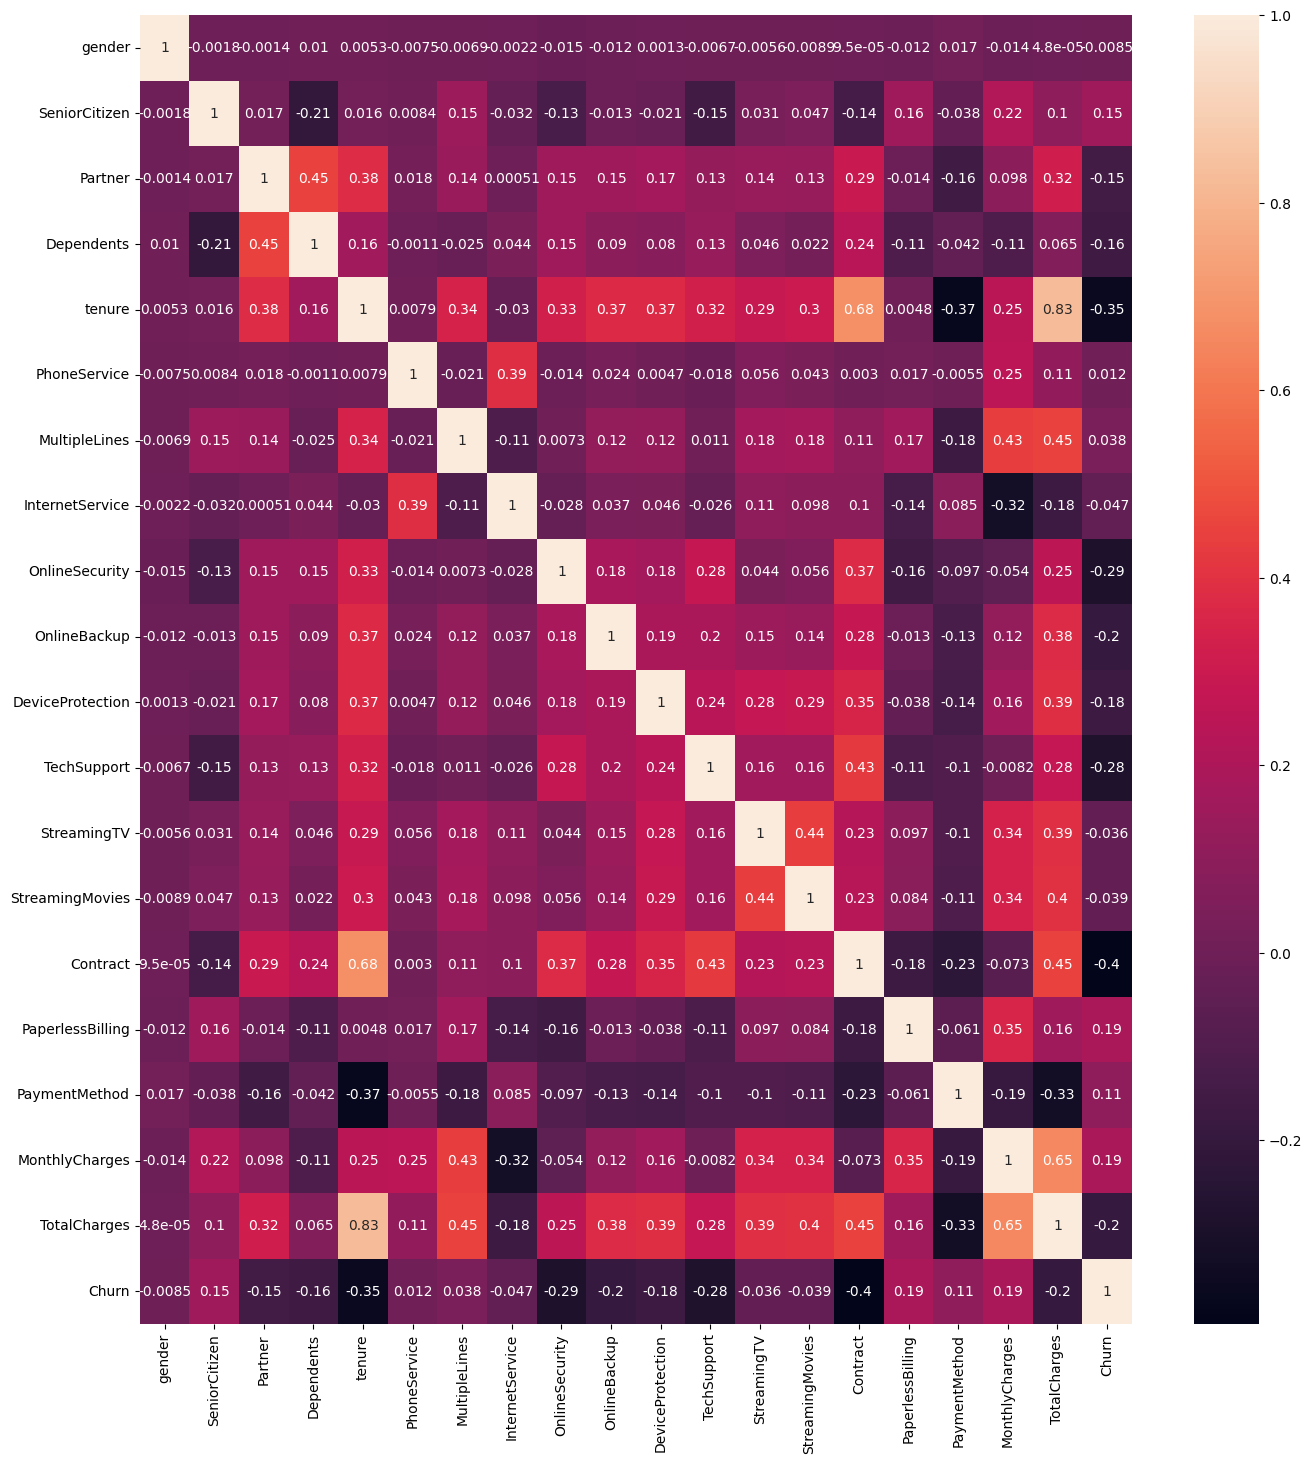

In [33]:
plt.figure(figsize=(16,17))
sns.heatmap(churn.corr(),annot=True)
plt.show()


In [34]:
corr=churn.corr()
print(corr)

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001819 -0.001379    0.010349  0.005285   
SeniorCitizen    -0.001819       1.000000  0.016957   -0.210550  0.015683   
Partner          -0.001379       0.016957  1.000000    0.452269  0.381912   
Dependents        0.010349      -0.210550  0.452269    1.000000  0.163386   
tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
PhoneService     -0.007515       0.008392  0.018397   -0.001078  0.007877   
MultipleLines    -0.006908       0.146287  0.142717   -0.024975  0.343673   
InternetService  -0.002236      -0.032160  0.000513    0.044030 -0.029835   
OnlineSecurity   -0.014899      -0.127937  0.150610    0.151198  0.327283   
OnlineBackup     -0.011920      -0.013355  0.153045    0.090231  0.372434   
DeviceProtection  0.001348      -0.021124  0.165614    0.079723  0.372669   
TechSupport      -0.006695      -0.151007  0.126488    0.132530  0.324729   

In [35]:
print(corr['MonthlyCharges'].sort_values(ascending=False))

MonthlyCharges      1.000000
TotalCharges        0.651065
MultipleLines       0.433905
PaperlessBilling    0.351930
StreamingTV         0.337156
StreamingMovies     0.335761
PhoneService        0.248033
tenure              0.246862
SeniorCitizen       0.219874
Churn               0.192858
DeviceProtection    0.163984
OnlineBackup        0.119943
Partner             0.097825
TechSupport        -0.008237
gender             -0.013779
OnlineSecurity     -0.053576
Contract           -0.072739
Dependents         -0.112343
PaymentMethod      -0.192500
InternetService    -0.322173
Name: MonthlyCharges, dtype: float64


In [36]:
corr_pairs=corr.unstack().sort_values(ascending=False)
corr_pairs=corr_pairs[corr_pairs < 1]
print(corr_pairs.head(10))

tenure          TotalCharges      0.825880
TotalCharges    tenure            0.825880
tenure          Contract          0.676734
Contract        tenure            0.676734
MonthlyCharges  TotalCharges      0.651065
TotalCharges    MonthlyCharges    0.651065
MultipleLines   TotalCharges      0.453202
TotalCharges    MultipleLines     0.453202
Dependents      Partner           0.452269
Partner         Dependents        0.452269
dtype: float64


In [37]:
x=churn.drop('Churn',axis=1)
y=churn['Churn']

In [38]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
rf=RandomForestClassifier(random_state=42) # using random forest

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred=rf.predict(x_test)

In [43]:
accuracy_score(rf.predict(x_train),y_train)

0.9976888888888888

In [44]:
accuracy_score(y_pred,y_test)

0.7924662402274343

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [46]:
clf=RandomForestClassifier(
    n_estimators=200,
    max_features=4,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

clf.fit(x_train,y_train)


RandomForestClassifier(max_features=4, n_estimators=200, random_state=42)

In [47]:
param_dist = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

In [48]:
print(param_dist)

{'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [None, 5, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None], 'bootstrap': [True, False]}


In [49]:
random_search=RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    random_state=42,
    n_jobs=-1
)



In [50]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_features=4,
                                                    n_estimators=200,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   random_state=42)

In [51]:
best_params=random_search.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [52]:
best_model=RandomForestClassifier(**best_params)
best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [53]:
y_pred = best_model.predict(x_test)

In [54]:
test_acc = accuracy_score(y_test, y_pred)


In [55]:
test_acc

0.798862828713575

In [56]:
train_pred = best_model.predict(x_train)
accuracy_score(y_train, train_pred)

0.8976

In [57]:
import pandas as pd

importances = best_model.feature_importances_
pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

,feature,importance
4,tenure,0.172492
17,MonthlyCharges,0.152375
18,TotalCharges,0.149598
14,Contract,0.135149
8,OnlineSecurity,0.061619
11,TechSupport,0.051761
16,PaymentMethod,0.043101
7,InternetService,0.040258
9,OnlineBackup,0.031513
15,PaperlessBilling,0.021166


In [58]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(x_train)

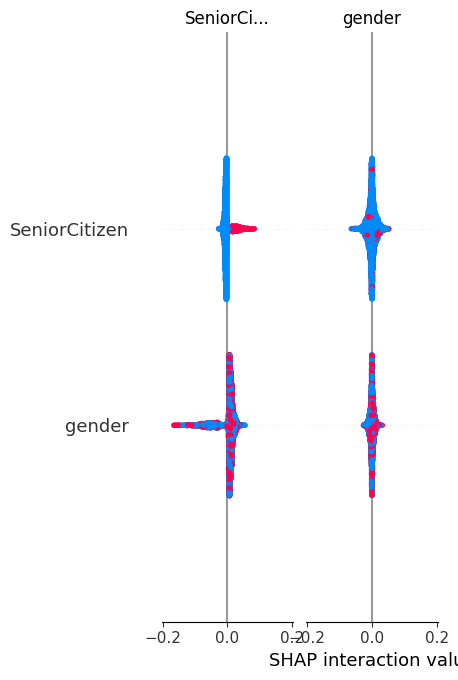

In [59]:
shap.summary_plot(shap_values, x_train)

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, x, y, cv=5)
print(scores)              # Every fold score
print(scores.mean())       # Average Performance
print(scores.std())        # Variance Indicator

[0.80170576 0.80739161 0.77880512 0.81009957 0.80014225]
0.7996288623939841
0.011028158079575094


In [61]:
train_acc = best_model.score(x_train, y_train)
test_acc = best_model.score(x_test, y_test)
gap = train_acc - test_acc

In [62]:
print(train_acc, test_acc)
print("GAP =", train_acc - test_acc)

0.8976 0.798862828713575
GAP = 0.09873717128642501


In [63]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit(x)

print(selector.variances_)

[2.49977977e-01 1.36026547e-01 2.49694049e-01 2.09394770e-01
 7.10000000e+01 8.73497523e-02 8.99765787e-01 5.43491738e-01
 7.39429357e-01 7.74982738e-01 7.74603923e-01 7.42375825e-01
 7.83618055e-01 7.83794722e-01 6.93680425e-01 2.41403187e-01
 1.13940318e+00 1.00500000e+02 8.66600000e+03]


In [65]:
dt = pd.DataFrame(x)
print(dt.var())        # Feature-wise variance

gender              2.500135e-01
SeniorCitizen       1.360459e-01
Partner             2.497296e-01
Dependents          2.094246e-01
tenure              6.024698e+02
PhoneService        8.736218e-02
MultipleLines       8.998938e-01
InternetService     5.435690e-01
OnlineSecurity      7.395345e-01
OnlineBackup        7.750930e-01
DeviceProtection    7.747141e-01
TechSupport         7.424814e-01
StreamingTV         7.837295e-01
StreamingMovies     7.839062e-01
Contract            6.937791e-01
PaperlessBilling    2.414375e-01
PaymentMethod       1.139565e+00
MonthlyCharges      9.051658e+02
TotalCharges        5.138252e+06
dtype: float64
